In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to C:\Users\Sanket
[nltk_data]     Dalvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
tw = pd.read_csv('twitter.csv')
tw.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Analysing the Datset

Lets rename them for our reference

In [5]:
tw.columns = ['ID', 'Sentiment', 'Tweet']
tw.head()

,ID,Sentiment,Tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Lets map 0 -> Negative and 1 -> Positive as directed by the datset desciption. 

In [7]:
tw['Sentiment'] = tw['Sentiment'].replace({0: 'Positive', 1: 'Negative'})
tw.head()

,ID,Sentiment,Tweet
0,1,Positive,@user when a father is dysfunctional and is s...
1,2,Positive,@user @user thanks for #lyft credit i can't us...
2,3,Positive,bihday your majesty
3,4,Positive,#model i love u take with u all the time in ...
4,5,Positive,factsguide: society now #motivation


C:\Users\Sanket Dalvi\AppData\Local\Temp\ipykernel_22996\2314574154.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Sentiment', data=tw, palette=['green', 'red'])


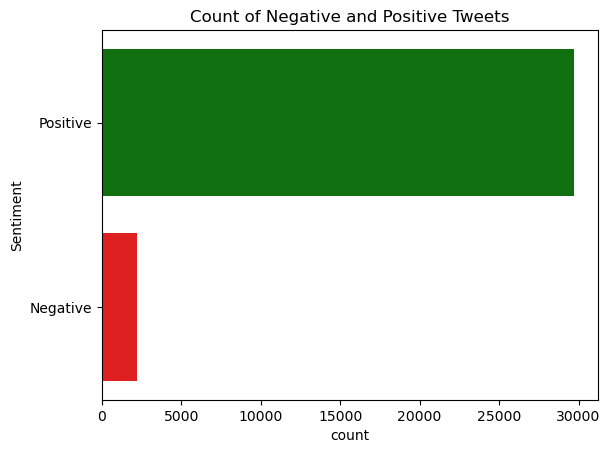

In [8]:
sns.countplot(y='Sentiment', data=tw, palette=['green', 'red'])
plt.title('Count of Negative and Positive Tweets')
plt.show()

In [9]:
import random
random_idx_list = [random.randint(1,len(tw.Tweet)) for i in range(10)]
tw.loc[random_idx_list,:].head(10)

,ID,Sentiment,Tweet
28571,28572,Positive,it was fun @ #dreamproject #dreamproject16 @...
8562,8563,Positive,life is fun #live #love #photo #canon #amer...
21,22,Positive,sad little dude.. #badday #coneofshame #cats...
19906,19907,Positive,happy friday everyone!!!! âºï¸ððð ...
24554,24555,Positive,this whole world is out of control. so so #y...
31495,31496,Positive,#shufflelp #cunnilingus #study #bracelet #he...
30187,30188,Positive,more love! #orlando #pulsenightclub #onelove #...
13709,13710,Positive,@user @user @user what is nbc doing retweeting...
24933,24934,Negative,sex postion picture white girl has sex with b...
14723,14724,Positive,"good morning ð, ð #vacay #philippines"


The dataset is Unclean so we wil clean the data set and visualize it

# Visualization of words in tweets

In [10]:
import re

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [11]:
def preprocess(Tweet, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(Tweet).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [12]:
tw.text = tw.Tweet.apply(lambda x: preprocess(x))

C:\Users\Sanket Dalvi\AppData\Local\Temp\ipykernel_22996\596618572.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tw.text = tw.Tweet.apply(lambda x: preprocess(x))


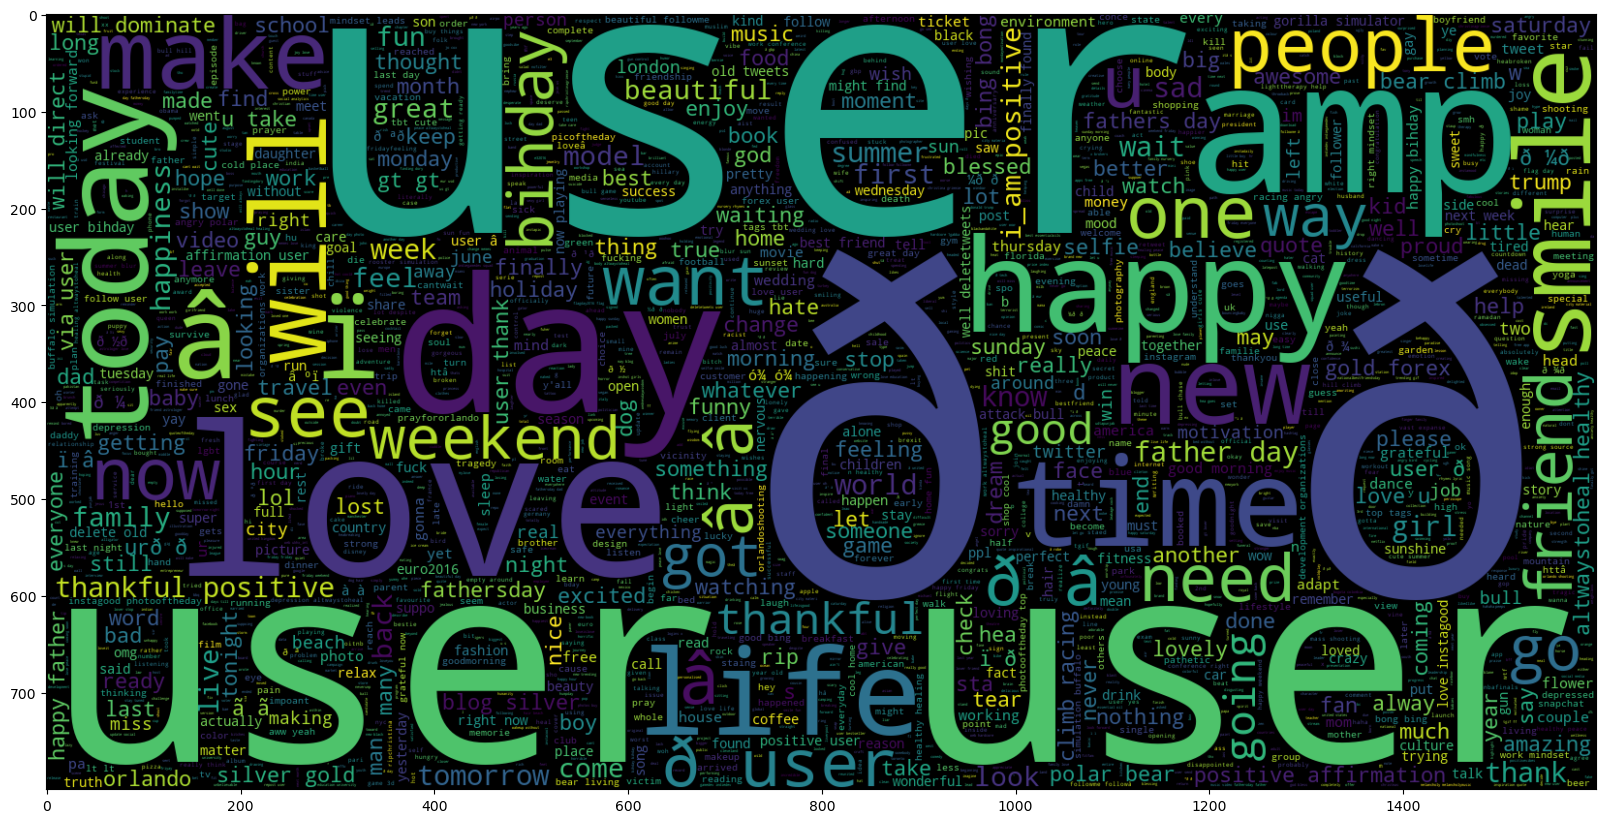

In [13]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tw[tw.Sentiment == 'Positive'].Tweet))
plt.imshow(wc , interpolation = 'bilinear')

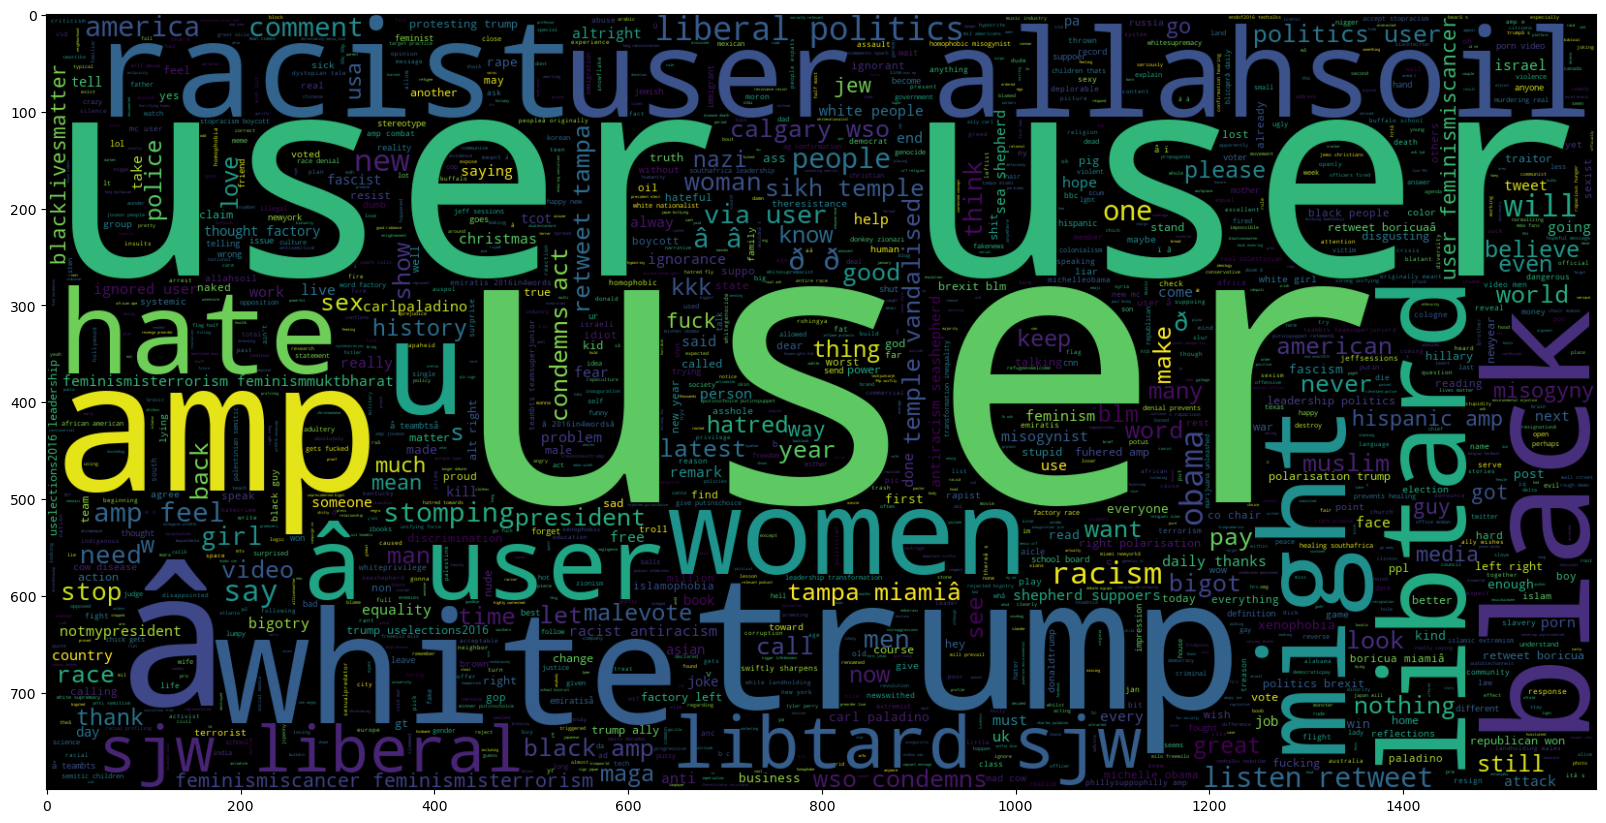

In [14]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tw[tw.Sentiment == 'Negative'].Tweet))
plt.imshow(wc , interpolation = 'bilinear')